# Exploration of Prosper Loan Data
## by Gabriella Arroyo

## Preliminary Wrangling

> Prosper offers fixed rate, “fully amortizing**”, unsecured loans from \\$2,000 and \\$40,000. Loan terms of 3 and 5 years are available, depending upon Prosper Rating and loan amount. Along with attractive rates, these loans are offered with no penalties for paying off your loan early or for making partial prepayments. See why personal loans through Prosper are a more attractive way to borrow than credit card or other consumer debt that could take years to pay off!

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_full = pd.read_csv('prosperLoanData.csv')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

The Prosper Loan Data has many columns that are not important to our anaylsis, it is hard to determine which columns have variables that would be worth analyzing. <br>
Firstly, I removed columns that have many null values, such as the set of columns referring to Prosper payments. Then, columns that are metadata not pertinent to the analysis, such as ID numbers, comments, dates and keys.  Next, I've removed columns that are derivatives of other columns (thus repetitive).  I've iterated on this a few times, removing columns that, I realized as I did my analysis, I did not need. 

In [3]:

col_list = ['Term', 'LoanStatus', 'BorrowerRate','ListingCategory (numeric)','EmploymentStatus', 'IsBorrowerHomeowner',
            'CreditScoreRangeLower','DelinquenciesLast7Years','BankcardUtilization', 'DebtToIncomeRatio','IncomeRange',
            'IncomeVerifiable', 'StatedMonthlyIncome','LoanOriginalAmount']
df = df_full[col_list]
#dropping rows with null values
df = df.dropna()

In [4]:
num_vars = ['BorrowerRate','CreditScoreRangeLower', 'DelinquenciesLast7Years', 'BankcardUtilization', 'DebtToIncomeRatio',
            'StatedMonthlyIncome','LoanOriginalAmount']
cat_vars = ['Term', 'LoanStatus', 'ListingCategory (numeric)','EmploymentStatus',
       'IsBorrowerHomeowner', 'IncomeRange','IncomeVerifiable']

#Checking that I've included all the columns I orinally intended to
len(num_vars) +len(cat_vars) == len(col_list)

True

In [5]:
df.shape

(97903, 14)

### What is the structure of your dataset?

My dataset originally had about 110,000 entries and over 40 columns, but I looked at the data and started removing columns that were likely not pertinent to the analysis I wanted to explore. Then, I removed all rows that had any null values. Now, my dataset has decreased to 98,000 rows, and 14 columns. Of those 14 columns, 7 are quantitative. 

I will be exploring the following variables: <br>
    Term,  LoanStatus,  BorrowerRate,  ListingCategory (numeric),  EmploymentStatus,   IsBorrowerHomeowner,  <br>
    CreditScoreRangeLower,  DelinquenciesLast7Years,  BankcardUtilization,  DebtToIncomeRatio,  IncomeRange, <br>
    IncomeVerifiable,  StatedMonthlyIncome,  LoanOriginalAmount <br>

### What is/are the main feature(s) of interest in your dataset?

The main features I'd like to search into are: Credit Scores, and Interest Rates; which factors affect these two variables and vice versa. I explain further why I am focusing on these two features in the bivariate analysis portion

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


## Univariate Exploration



### Part 1: Numerical Variables

#### Stated Monthly Income

In [6]:
df.StatedMonthlyIncome.describe()

count     97903.000000
mean       5716.608053
std        4905.224349
min           0.000000
25%        3333.333333
50%        4833.333333
75%        6969.875000
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

In [7]:
df.query('StatedMonthlyIncome > 50000')['Term'].count()

53

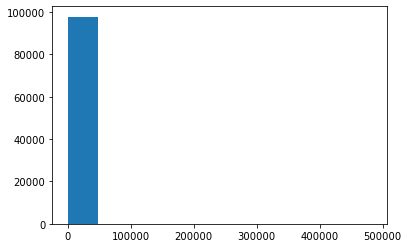

In [8]:
plt.hist(df.StatedMonthlyIncome);

The Stated Monthly income has 53 values in which people state that they make over 100,000 in monthly income.
This skews the x-limits and the bin sizes of the histogram above. 

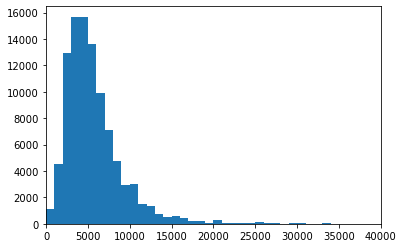

In [9]:
#setting an xlimit, and resizing bins
binz = np.arange(0,50000,1000)
plt.hist(df.StatedMonthlyIncome, bins = binz)
plt.xlim(0,40000);

Setting an X-limit shows the actual distribution, which is left skewed, with a peak at about $5,000 a month

For bi-variate and multi variate plots, I will need to actually remove the very high values in order to make readable plots. I will make a duplicate dataframe (df_income) with these high values removed, therefore I don't remove important data from other columns and other analyses. 

In [10]:
df_income = df[df['StatedMonthlyIncome'] < 10000]
print(df_income.StatedMonthlyIncome.describe())
print(df_income.shape)

count    88259.000000
mean      4774.676645
std       2069.286468
min          0.000000
25%       3234.875000
50%       4525.000000
75%       6250.000000
max       9999.166667
Name: StatedMonthlyIncome, dtype: float64
(88259, 14)


In [11]:
#In the multivariate section, i would like to make some heat plots using income range, but I don't want to show those 
#with no employment or no income displayed, so I'm creating a second dataframe with those values removed

df_income2 = df_income.loc[df_income['IncomeRange'].isin(['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999'])]
cat_ord = ['$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999']
ord_class = pd.api.types.CategoricalDtype(ordered = True, categories = cat_ord)
df_income2['IncomeRange'] = df_income2['IncomeRange'].astype(ord_class);
df_income2['IncomeRange'].value_counts()

<ipython-input-11-46c14bfee8e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income2['IncomeRange'] = df_income2['IncomeRange'].astype(ord_class);


$25,000-49,999    29881
$50,000-74,999    29359
$75,000-99,999    16007
$1-24,999          6360
Name: IncomeRange, dtype: int64

#### Borrower Rate

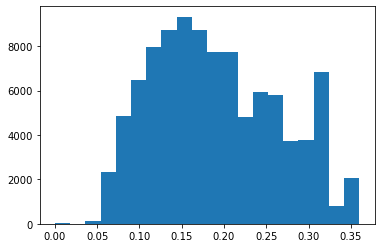

In [12]:
plt.hist(df.BorrowerRate, bins = 20);

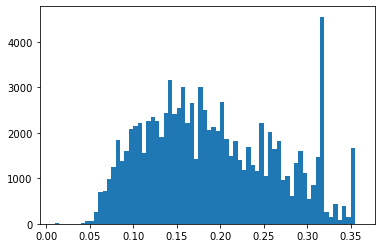

In [13]:
#The borrower rate shows a large peak between 0.3 and 0.32
binz = np.arange(0.01,.3605,.005)
plt.hist(df.BorrowerRate, bins = binz);

In [14]:
df.BorrowerRate.mode()
#The mode borrower rate is .3177. This value has about 4,000 instances. 

0    0.3177
dtype: float64

#### Credit Score Range

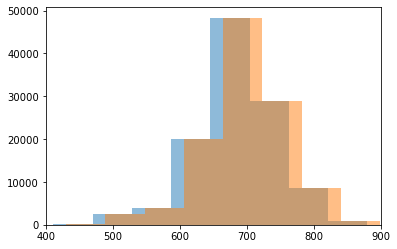

In [15]:
#plotting both upper and lower credit ranges to see how they compare
plt.hist(df_full.CreditScoreRangeLower, bins = 15, alpha = 0.5);
plt.hist(df_full.CreditScoreRangeUpper, bins = 15, alpha = 0.5);
plt.xlim(400,900);

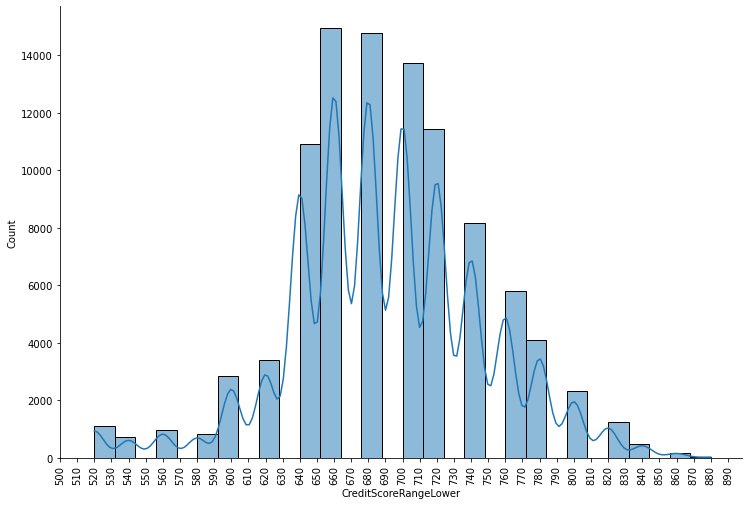

In [16]:
sb.displot(df.CreditScoreRangeLower, bins = 30, height = 7, aspect = 1.5, kde = True)
x_ticks = np.arange(500,900,10)
plt.xticks(x_ticks,x_ticks, rotation = 90);
# For some reason, there are areas with no credit score values, such as 570, 630, 690, 750 and 810. 
#Perhaps those values are bracket within the 'CreditScoreRangeUpper' column, which he have removed 
#from our smaller dataframe

#### Loan Amount

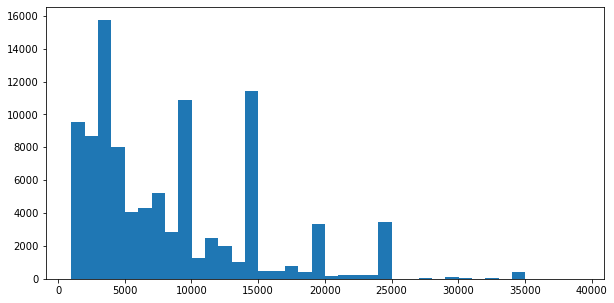

In [17]:
plt.figure(figsize = [10,5])
binz = np.arange(1000,40001,1001)
plt.hist(df.LoanOriginalAmount, bins = binz);

In [18]:
print(df.LoanOriginalAmount.mode())
df.LoanOriginalAmount.describe()

0    4000
dtype: int64


count    97903.000000
mean      8695.142999
std       6359.698924
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

Loan Amounts range from \\$2,000 - \\$40,000 per Prosper's website, but the amount of \\$40,000 loans in this dataset appears to be zero, and the maximum \\$35,000. Perhaps the maximum loan cutoff has increased between now and the time this 
dataset was created.

Most loans are small, in the \\$2,000-\\$5,000 range, with the mode being at \\$4,000. But there are large peaks at \\$10,000, \\$15,000, \\$20,000 and \\$25,000.

#### Bank Card Utilization

count    97903.000000
mean         0.565739
std          0.317582
min          0.000000
25%          0.310000
50%          0.610000
75%          0.840000
max          5.950000
Name: BankcardUtilization, dtype: float64
Percentage of people using over 100% of their bank card limit: 1.70 %


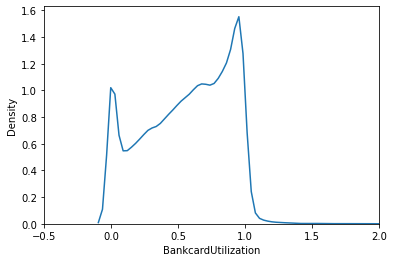

In [19]:
#plt.figure(figsize = [10,5])
#binz = np.arange(0,2,.1)
#plt.hist(df.BankcardUtilization, bins = binz);
sb.kdeplot(df.BankcardUtilization)
plt.xlim(-.5,2);
print(df.BankcardUtilization.describe())

z = df.query('BankcardUtilization > 1')['Term'].count() / df.shape[0] *100
z = "{:.2f}".format(z)
print('Percentage of people using over 100% of their bank card limit:',z,'%')

This concerning bimodal histogram shows two spikes at 0% and 100%, with bank card utilization steadily increasing in between.
The decription indicates that over 75% of people applying for loans are using over 30% of their bank-card credit with 1.7% of users using over 100%. 

#### Delinquencies

count    97903.000000
mean         4.031909
std          9.922944
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         99.000000
Name: DelinquenciesLast7Years, dtype: float64

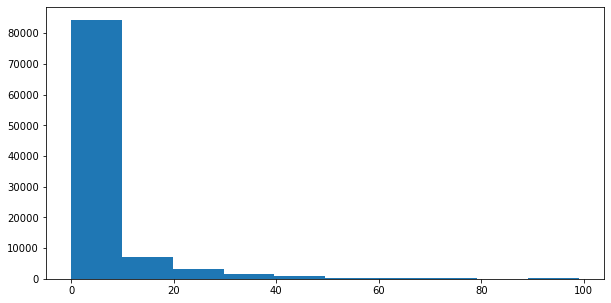

In [20]:
plt.figure(figsize = [10,5])
plt.hist(df.DelinquenciesLast7Years);
df.DelinquenciesLast7Years.describe()

Most clients have no delinquencies, but about 25% of loaners have at least one. I will create a new variable that's binary, etiher No Delinquencies or Yes Delinquencies. 

In [21]:
Del = df.DelinquenciesLast7Years
Del[Del>1] =1
Del.describe()
df['Delinquencies_YesNo']= Del

In [22]:
df.Delinquencies_YesNo.mean()

0.3176511445001685

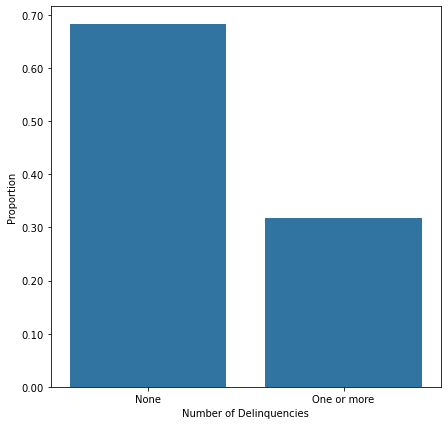

In [23]:
n = df.shape[0]
counts = df['Delinquencies_YesNo'].value_counts()
max_counts = counts[0]
max_prop = max_counts/n

tick_props = np.arange(0,max_prop+ 0.1,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]

plt.figure(figsize = [7,7])
sb.countplot(data= df, x = 'Delinquencies_YesNo', color = base_color);
plt.yticks(tick_props * n, tick_names);
plt.xticks([0,1],['None','One or more'])
plt.ylabel('Proportion');
plt.xlabel('Number of Delinquencies');

31.7% of all clients have previous or current delinquencies

### Categorical Variables

#### Loan Term

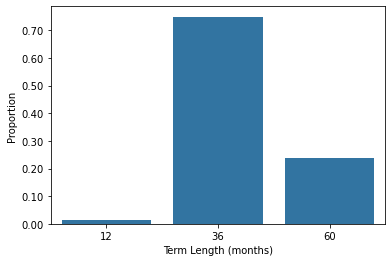

In [24]:
n = df.shape[0]
counts = df['Term'].value_counts()
max_counts = counts[36]
max_prop = max_counts/n

tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.yticks(tick_props * n, tick_names);

sb.countplot(data = df, x = 'Term', color = base_color);

plt.xlabel('Term Length (months)');
plt.ylabel('Proportion');

#### Listing Category

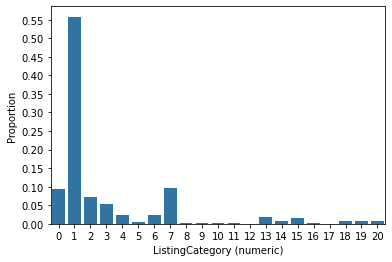

In [25]:
n = df.shape[0]
counts = df['ListingCategory (numeric)'].value_counts()
max_counts = counts[1]
max_prop = max_counts/n
tick_props = np.arange(0, max_prop, .05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = df, x = 'ListingCategory (numeric)', color = base_color);
plt.yticks(tick_props *n, tick_names);
plt.ylabel('Proportion');

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home 
Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic 
Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - 
Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The largest reason for taking out a Prosper Loan by orders of magnitude is Debt Consolidation, 55% of all loans are debt consolidation loans. Next highest is "Other", and third highest is "Not Available"  

#### Employment Status

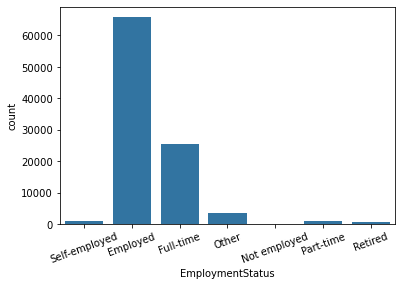

In [26]:
sb.countplot(data = df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 20);

This data is not usable and needs to be removed. The fact that employed and full time employed are two different options erroneously divides the data, making it hard to use or understand. There appear to be zero loans given out to unemployed people. 

#### Income Range

In [27]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', 'Not displayed'], dtype=object)

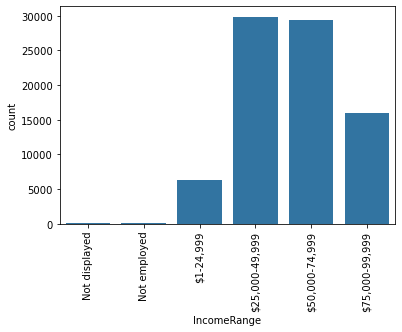

In [28]:
#Ordering the classes
cat_ord = ['Not displayed','Not employed','$1-24,999','$25,000-49,999', '$50,000-74,999','$75,000-99,999']
ord_class = pd.api.types.CategoricalDtype(ordered = True, categories = cat_ord)
df['IncomeRange'] = df['IncomeRange'].astype(ord_class);
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

I ordered these income range values from least income to most income. 

#### Loan Status

In [29]:
df.LoanStatus.value_counts()

Current                   52478
Completed                 30880
Chargedoff                 9423
Defaulted                  3075
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Cancelled                     1
Name: LoanStatus, dtype: int64

I am removing the one column called "Cancelled" since it only had one data point, and will mess up future bivariate plots

In [30]:
df_loan = df
df_loan.query('LoanStatus == "Cancelled"')
df_loan = df_loan.drop(index=[112975])
df_loan.LoanStatus.value_counts()

Current                   52478
Completed                 30880
Chargedoff                 9423
Defaulted                  3075
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

(0.0, 10000.0)

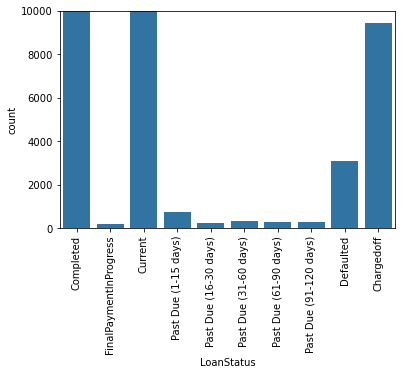

In [31]:
#Ordering the classes
cat_ord = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (16-30 days)',
           'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Defaulted','Chargedoff']
ord_class = pd.api.types.CategoricalDtype(ordered = True, categories = cat_ord)
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype(ord_class);

sb.countplot(data = df_loan, x = 'LoanStatus', color = base_color);
plt.xticks(rotation = 90);
plt.ylim(0,10000)

## Bivariate Exploration

#### Bivariate HeatMap

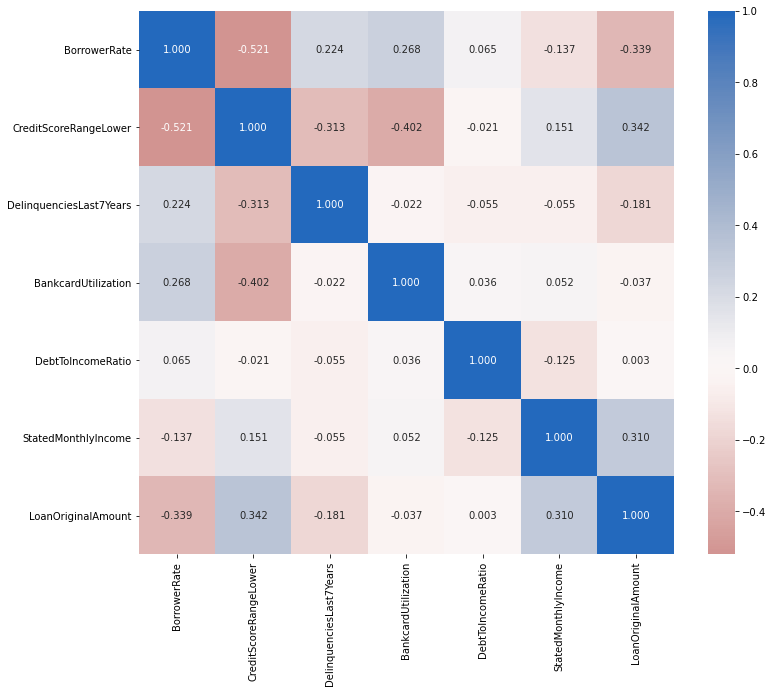

In [32]:
plt.figure(figsize = [12, 10])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

__Strong Negative Correlations Include:__<br>
CreditScore v Borrower Rate: (-.521) The higher a client's credit score the lower a loan's interest rate will be <br>
Loan Original Amount v Borrower Rate (-.339) Higher Loan amounts tend to have lower interest rates <br>
 Available Bank Card Credit   v. Borrower Rate (-.356) Those with higher lines of credit tend to have lower interest rates <br>
Current Delinquencies and Credit Score Range (-.284) Those with more current delinquencies tend to have lower credit scores <br>
Delinquencies Last 7 years and Credit Score Range (-.242) Those with more history of delinquencies tend to have lower credit scoress <br>
Bank Card Utilization v. Credit Score Range: (-.402) The greater utilization of credit cards, the lower a client's credit score tends to be <br>



__Strong Negative Correlations Include:__<br>
Bank Card Utilization v. Borrower Rate (.268) Those who use more of their lines of credit tend to have lower interest rates <br>
Available Credit v. Credit Score Range (.46) Those with higher lines of credit tend to have higher credit scores <br>
Loan Original amount v. Credit Score Range (.342) Those with higher credit scores are more likely to have larger loans <br>
Open Credit Lines v Open Revolving Monthly Payment : Those with more lines of credit tend to carry higher monthly credit balances <br>
<br>
<br>
Interestingly, Debt to Income Ratio doesn't seem to have a (relatively) large correlation to any of the other variables, and seems the least correlable of all quantitative variables. I don't think I will continue to use it in further plots <br>
<br>
<br>
Borrower Rate and Credit Score Range both seem to be highly correlative to other factors, and I believe these two variables will be at the heart of my analysis. 


#### Bivariate Plot Matrix

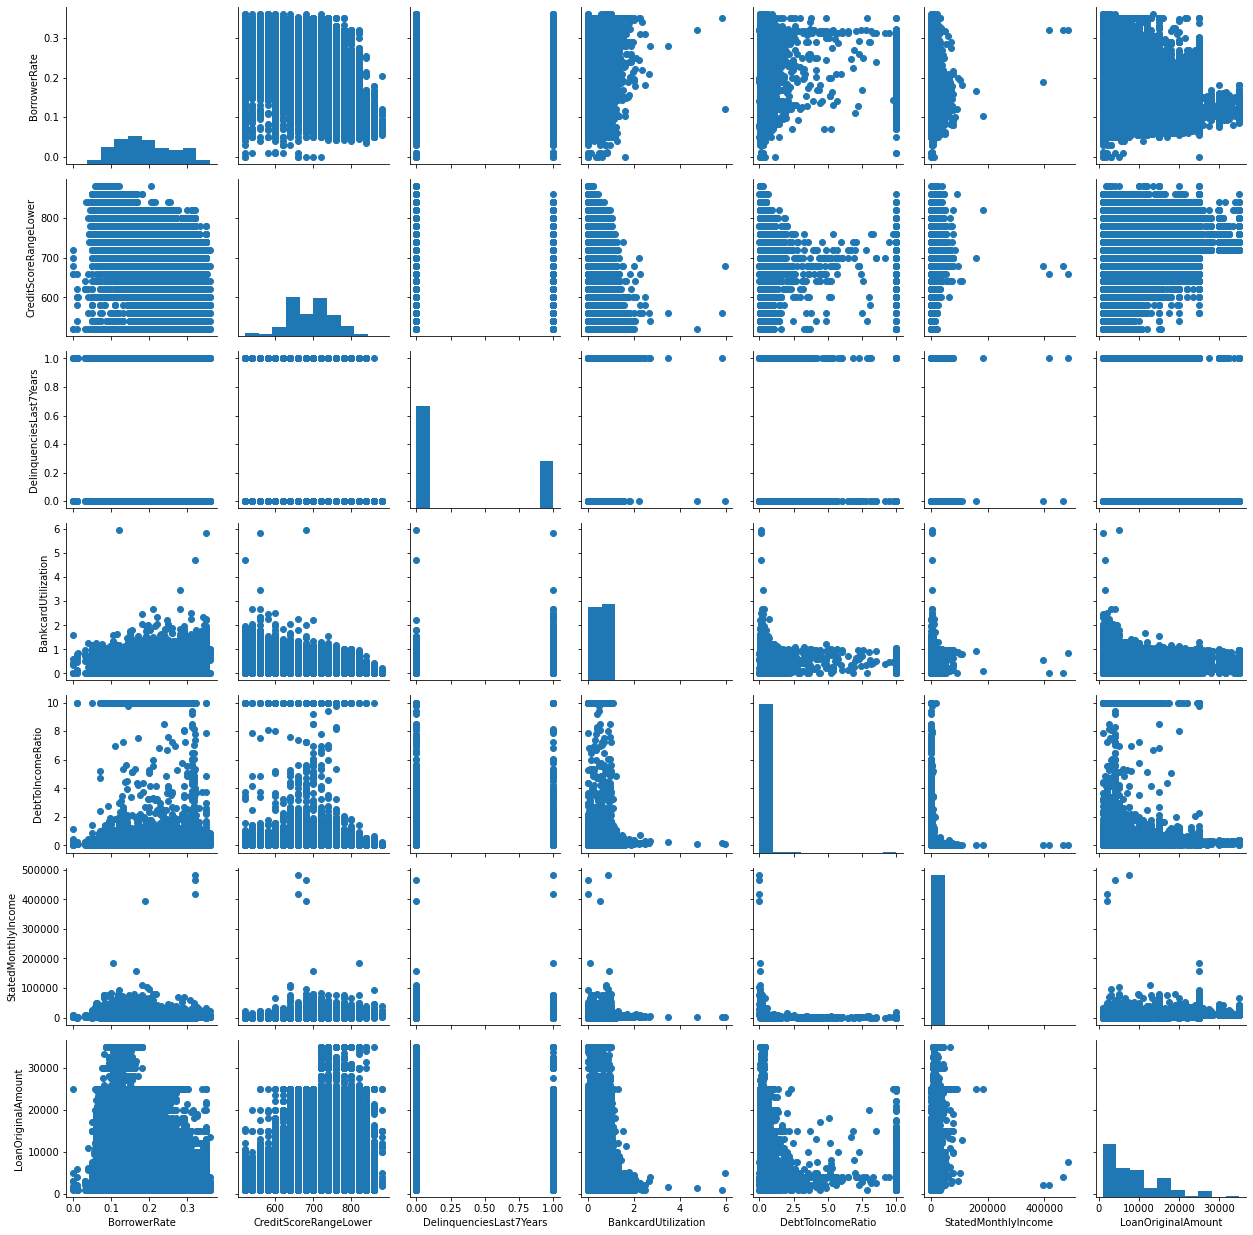

In [33]:
g = sb.PairGrid(data = df[num_vars])
g = g.map_offdiag(plt.scatter);
g = g.map_diag(plt.hist);

The Plot Matrix shows a few key insights: 
- Smaller Term loans are not available for larger loans (loans over \\$25,000) 
- Larger loans (over \\$25,000) tend to have lower interest rates, and tend to be given to those with credit scores higher than 700. 
- Above credit scores over 700, borrower rates start to slightly taper. Above 800, interest rates more quickly taper from up to 30% to 20%. 
- One person with a credit score of over 700 took out a loan with a 40% interest rate. 
- Interest rates are incredibly high, ranging from 5 - 35% 
- Most loans given out by proscper are less than \\$5,000, with a sharp decline over \\$10,000, and small peaks at \\$15,000 and \\$25,000. 
- The Stated Monthly income histogram is very confusing. It's clear there are monthly incomes over 500,000 skewing the axes. It may be worth removing these points; they could be accurate, or they could be annual incomes posted monthly on accident. 

#### Credit Score v Borrower Rate

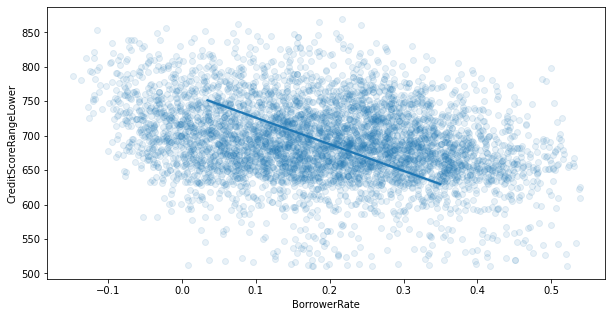

In [34]:
df_samp = df.sample(5000,replace=False)

plt.figure(figsize = [10,5])
sb.regplot(data = df_samp, x = 'BorrowerRate',y =  'CreditScoreRangeLower',  x_jitter = 0.2, y_jitter = 10, scatter_kws = {'alpha':1/10});

This scatter plot shows in more detail the negative correlation between Credit Score and Borrower Rate (-.521).
Credit scores below 650 tend to be more rare. 

#### Loan Amount v Term

<AxesSubplot:xlabel='Term', ylabel='LoanOriginalAmount'>

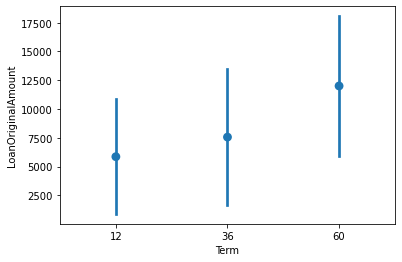

In [35]:
sb.pointplot(data = df_samp, x = 'Term', y = 'LoanOriginalAmount',ci = 'sd', linestyles = "",)

The point plot shows the positive relationship between Loan Amounts and term lengths.

#### Borrower Rate v. Verifiable Income, Delinquencie and Home Ownership

Text(0.5, 1.0, 'Borrower Rate v Home Ownership')

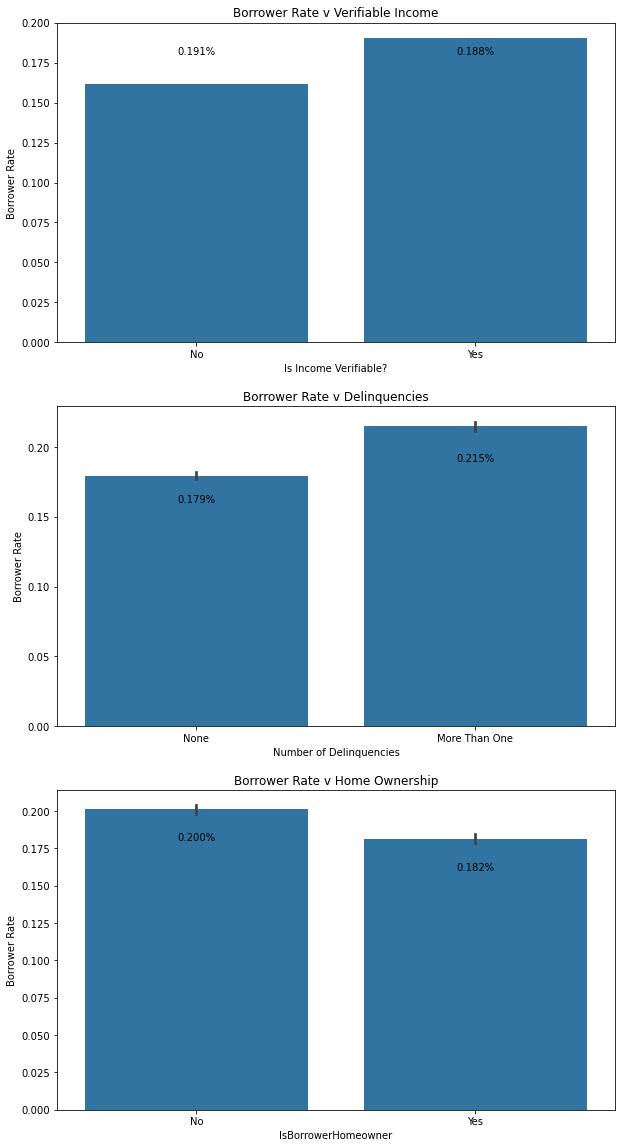

In [36]:
plt.figure(figsize = [10,20])
plt.subplot(3,1,1)
sb.barplot(data = df_samp, x = 'IncomeVerifiable', y = 'BorrowerRate', color = base_color, ci = None) ;

plt.xticks([0,1],['No','Yes'])
plt.ylabel('Borrower Rate');
plt.xlabel('Is Income Verifiable?');

means = df.groupby('IncomeVerifiable')['BorrowerRate'].mean()
plt.text(0, .18, '{:.3f}%'.format(means[1]), ha = 'center')
plt.text(1, .18, '{:.3f}%'.format(means[0]), ha = 'center')
plt.title('Borrower Rate v Verifiable Income')

plt.subplot(3,1,2)
sb.barplot(data = df_samp, x = 'Delinquencies_YesNo', y = 'BorrowerRate', color = base_color); 

plt.xticks([0,1],['None','More Than One'])
plt.ylabel('Borrower Rate');
plt.xlabel('Number of Delinquencies');

means = df.groupby('Delinquencies_YesNo')['BorrowerRate'].mean()
plt.text(0, .16, '{:.3f}%'.format(means[0]), ha = 'center');
plt.text(1, .19, '{:.3f}%'.format(means[1]), ha = 'center');
plt.title('Borrower Rate v Delinquencies')

plt.subplot(3,1,3)
sb.barplot(data = df_samp, x = 'IsBorrowerHomeowner', y = 'BorrowerRate', color = base_color); 

plt.xticks([0,1],['No','Yes'])
plt.ylabel('Borrower Rate');
plt.xlabel('IsBorrowerHomeowner');

means = df.groupby('IsBorrowerHomeowner')['BorrowerRate'].mean()
plt.text(0, .18, '{:.3f}%'.format(means[0]), ha = 'center');
plt.text(1, .16, '{:.3f}%'.format(means[1]), ha = 'center');
plt.title('Borrower Rate v Home Ownership')

There is a very marginal difference between the Borrower Rate given to poeple with verifiable income and those without

On average, loanees with previous delinquencies pay a higher borrower rate than those who do not have any history of delinquencies. 

On average, those who are homeowners pay a lower borroer rate than those who are not

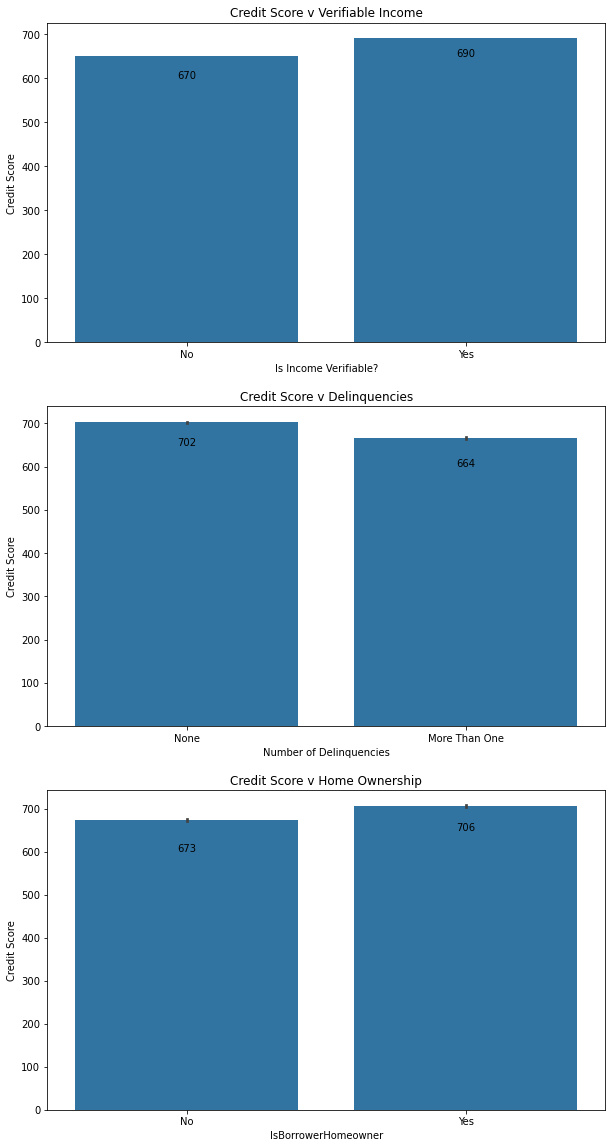

In [37]:
plt.figure(figsize = [10,20])
plt.subplot(3,1,1)
sb.barplot(data = df_samp, x = 'IncomeVerifiable', y = 'CreditScoreRangeLower', color = base_color, ci = None) ;

plt.xticks([0,1],['No','Yes'])
plt.ylabel('Credit Score');
plt.xlabel('Is Income Verifiable?');

means = df.groupby('IncomeVerifiable')['CreditScoreRangeLower'].mean()
plt.text(0, 600, '{:.0f}'.format(means[0]), ha = 'center')
plt.text(1, 650, '{:.0f}'.format(means[1]), ha = 'center')
plt.title('Credit Score v Verifiable Income')

plt.subplot(3,1,2)
sb.barplot(data = df_samp, x = 'Delinquencies_YesNo', y = 'CreditScoreRangeLower', color = base_color); 

plt.xticks([0,1],['None','More Than One'])
plt.ylabel('Credit Score');
plt.xlabel('Number of Delinquencies');

means = df.groupby('Delinquencies_YesNo')['CreditScoreRangeLower'].mean()
plt.text(0, 650, '{:.0f}'.format(means[0]), ha = 'center');
plt.text(1, 600, '{:.0f}'.format(means[1]), ha = 'center');
plt.title('Credit Score v Delinquencies')

plt.subplot(3,1,3)
sb.barplot(data = df_samp, x = 'IsBorrowerHomeowner', y = 'CreditScoreRangeLower', color = base_color); 

plt.xticks([0,1],['No','Yes'])
plt.ylabel('Credit Score');
plt.xlabel('IsBorrowerHomeowner');

means = df.groupby('IsBorrowerHomeowner')['CreditScoreRangeLower'].mean()
plt.text(0, 600, '{:.0f}'.format(means[0]), ha = 'center');
plt.text(1, 650, '{:.0f}'.format(means[1]), ha = 'center');
plt.title('Credit Score v Home Ownership');

#### Income Range Violin Plots: Bank Card Utilization, Credit Score, and Borrower Rate

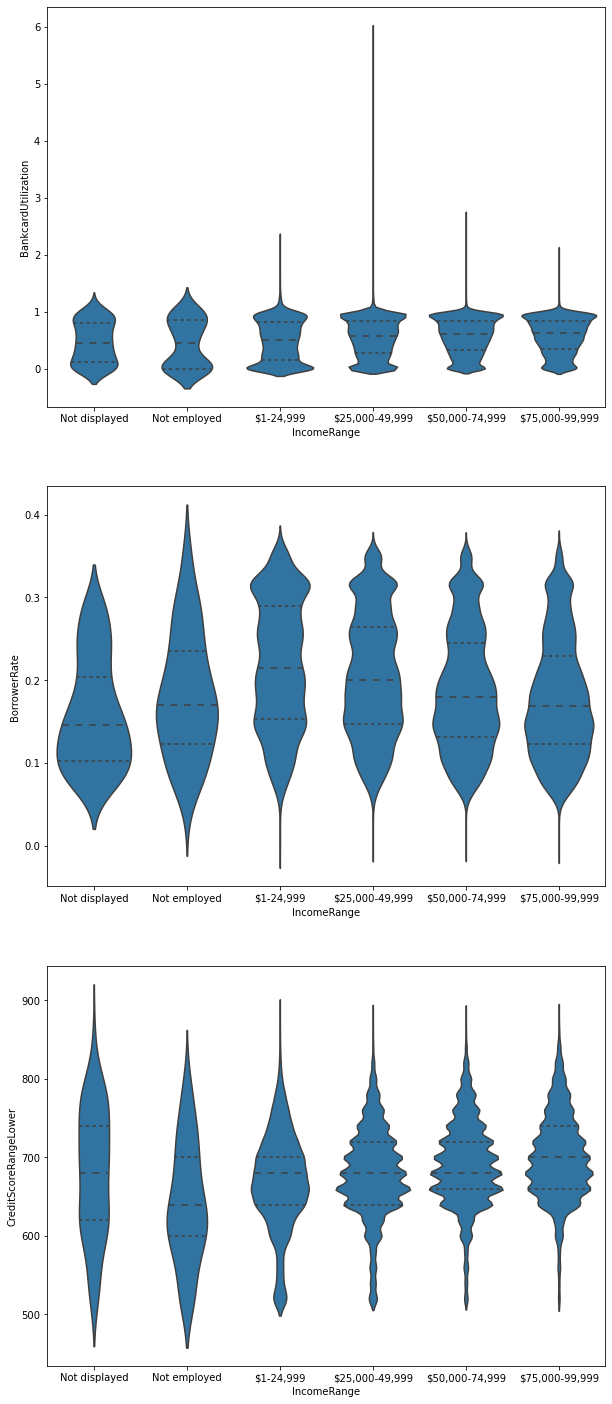

In [38]:
plt.figure(figsize = [10, 25])
plt.subplot(3,1,1)
sb.violinplot(data = df, x = 'IncomeRange', y = 'BankcardUtilization', inner = 'quartile', color = base_color);
plt.subplot(3,1,2)
sb.violinplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', inner = 'quartile', color = base_color);
plt.subplot(3,1,3)
sb.violinplot(data = df, x = 'IncomeRange', y = 'CreditScoreRangeLower', inner = 'quartile', color = base_color);

Interestingly, those who use the least amount of their bank card credit are either in the lowest income range, or not employed (or not displayed). The average and 3rd quartile usage increases as income increases. These averages may be biased from the general population, since this population consists of only those who are taking out loans. 

Even though, on average, Bank Card Utilization increases with income, the outliers with the highest utilization (6x over their allotment) are in the 25,000-49,000 income range.

Borrower Rates are surprisingly low for those that are not displayed or not employed. Of those with listed incomes, interest rate quartiles decrease steadily with income range. Although those listed as unemployed have lower interest rates on average, they have a much longer upper tail. 
Unlike borrower rates, borrowers who are unemployed seem to follow the greater trend. The average and quartiles of credit scores steadily increase with income ranges. 

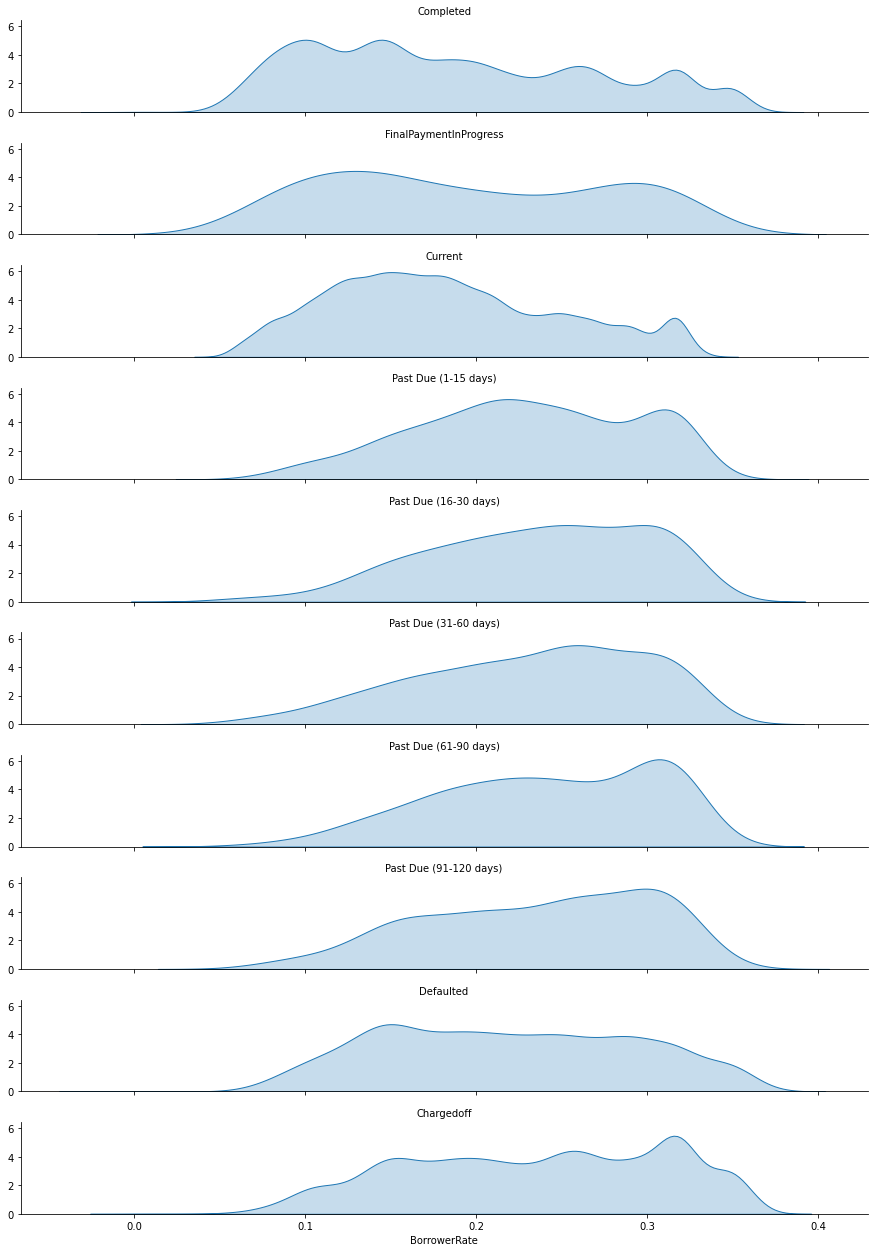

In [39]:

group_means = df_loan.groupby(['LoanStatus']).mean()
group_order = group_means.sort_values(['BorrowerRate'], ascending = False).index

#I've decided not to group these by increasing borrower rate, and instead show them by the inherent delinquency order 
g = sb.FacetGrid(data = df_loan, row = 'LoanStatus', height = 1.75, aspect = 7);
g.map(sb.kdeplot, 'BorrowerRate', shade = True)
g.set_titles('{row_name}');

This ridgeline plot of Borrower Rate vs. Income Range is another visual 

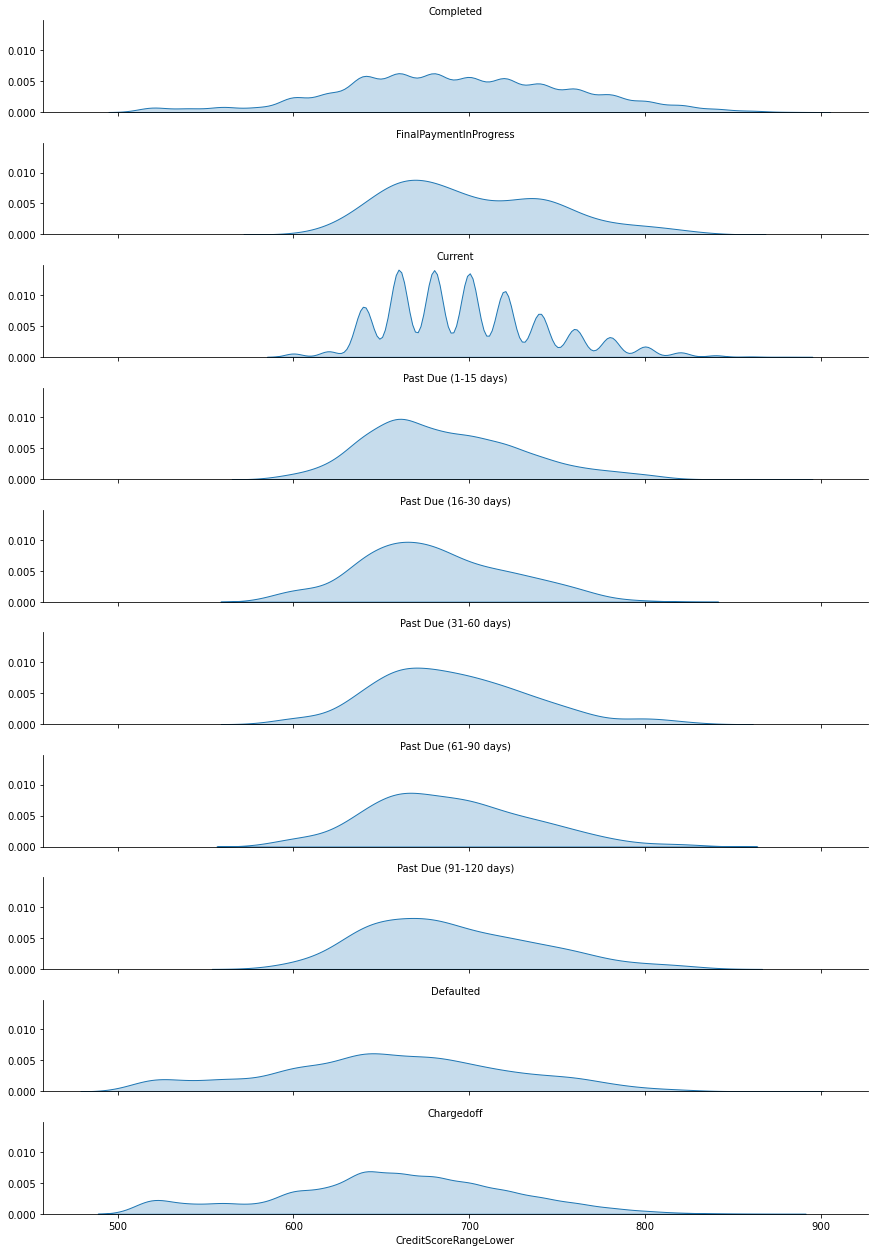

In [41]:
g = sb.FacetGrid(data = df_loan, row = 'LoanStatus', height = 1.75, aspect = 7)
g.map(sb.kdeplot, 'CreditScoreRangeLower', shade = True)
g.set_titles('{row_name}')

In order to understand these plots, I had to look up the definition of defaulted loans and charged off loans:

Loan default occurs when a borrower fails to pay back a debt according to the initial arrangement. In the case of most consumer loans, this means that successive payments have been missed over the course of weeks or months.

A loan becomes “charged off” when there is no longer a reasonable expectation of further payments. Charge off typically occurs when a loan is 120 days or more past due.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

My two main features of interest are borrower Rate and Credit Score,which have a strong negative correlation with each other. 

Most loan terms are 36 months, and the least likely loan term is 12 months. 12-month loans are reserved for loans under \\$10,000. 60-month terms tend to be for larger loans, between \\$10,000 and \\$20,000.

Comparing borrower rate to Verifiable Income, I saw very little difference between the two groups in the average interest rate (19.1% v 18.8%) .  In loanholders with delinquencies, though, there was a difference in average interest rate between those who have and have not had a delinquency (20% v 18.2%)  . In home ownership, the difference was even larger: 21.5% average for non-homeowners, v/ 17.9% for homeowners.  

Comparing credit score to Verifiable Income, there actually is a slight trend: credit scores are on average slightly higher for those who have verified income. The other two parameters follow similarly, homeowners tend have higher credit scores, and those with no delinquencies have higher credit scores on average. 

The Ridgeline plots I used to compare loan status show that credit scores steadily lower as payments become increasingly past due, and interest rates steadily increase. Completed and Current loans have a wide range of potential interest rates and credit scores, while Charged off loans skew more heavily toward low credit scores and high interest rates.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

AttributeError: 'FacetGrid' object has no attribute 'grid'

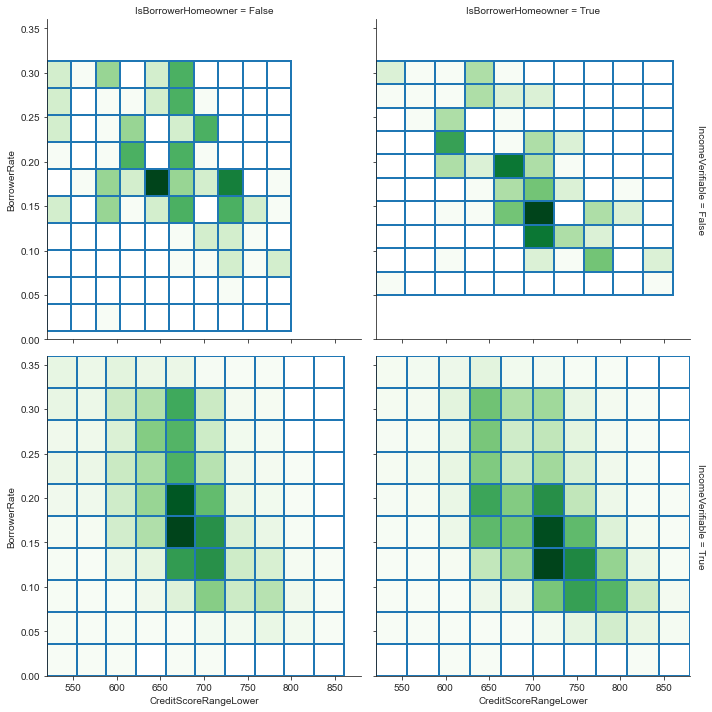

In [47]:

sb.set_style("ticks")
h = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', row = 'IncomeVerifiable', height = 5, margin_titles = True);
h.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmin = 0.05, cmap = "Greens");
h.grid(False)
h.set_xlabels('Credit Score');
h.set_ylabels('Loan Interest Rate');


In [ ]:
h = sb.FacetGrid(data = df_income2, col = 'Delinquencies_YesNo', height = 5, margin_titles = True);
h.map(plt.hist2d, 'CreditScoreRangeLower', 'StatedMonthlyIncome', cmin = 0.01, cmap = "Greens");
h.set_xlabels('Credit Score');
h.set_ylabels('Monthly_Income_Cut');

In [ ]:
h = sb.FacetGrid(data = df_income2,  row = 'IncomeRange', height = 6, margin_titles = True);
h.map(plt.hist2d, 'CreditScoreRangeLower', 'BorrowerRate', cmin = 0.05, cmap = "Greens");
h.set_xlabels('Credit Score');
h.set_ylabels('Loan Interest Rate');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I made a few multivariate plots using colors and shapes, but found that heatmaps were far and away the most visually informative. 

In the first set of heatmaps, I compared verifiable income and home ownership against credit scores and interest rates. For those who's income are unverified, the heat maps are more dispersive, with no even cluster around one center point. Those with verifiable income are much more evenly distributed. On average those with verified income have slightly higher credit score, and similar or slightly lower interest rates. The same is true for homeowners against non-homeowners. 

In the second plot, I compared monthly income and credit scores against number of delinquencies. Those with one or more delinquencies tend to haev lower credit scores, but there is no demonstrable difference in income between those who do and don't have past delinquencies. 

Lastly, I compared Credit Score and Borrower Rate against income ranges. There is a steady increase in credit score and decrease in interest rates as income range increases. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!